<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

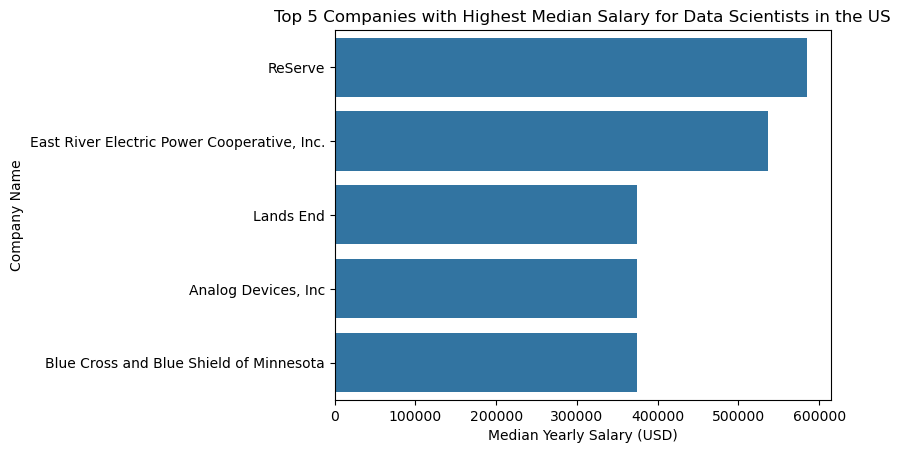

In [26]:
# Problem Statement:
# Create a Seaborn bar plot to visualize the top 5 companies with 
# the highest median salary_year_avg for Data Scientist job postings in the United States.


df_us=df[df.job_country.isin(['United States']) & df.job_title_short.isin(['Data Scientist'])].copy()
df_us=df_us.dropna(subset='salary_year_avg')
df_us=df_us.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).head().reset_index()
sns.barplot(data=df_us,x='salary_year_avg',y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

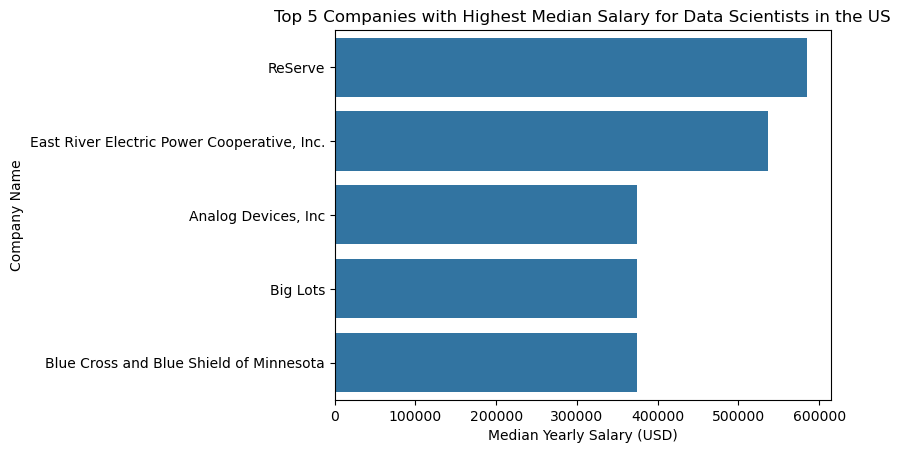

In [31]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()



---

## 🟨 Data Scientist Salary Histogram (2.20.2)

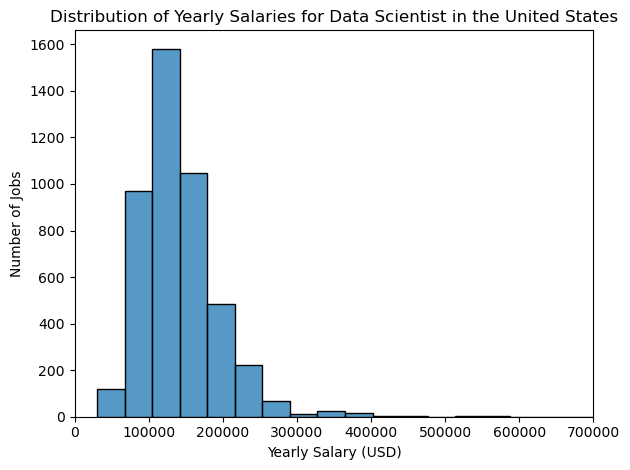

In [48]:
# Problem Statement:
# Create a histogram using Seaborn to visualize the distribution of average yearly salaries 
# (use the salary_year_avg column) for Data Scientist job postings in the United States:

# Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
# Use 25 bins for the histogram and set the x-axis limit to 700,000.
# Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and 
# label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

df_us=df[df.job_country.isin(['United States']) & df.job_title_short.isin(['Data Scientist'])].copy()
df_us=df_us.dropna(subset='salary_year_avg')
# df_us=df_us.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).head().reset_index()
sns.histplot(df_us.salary_year_avg,bins=25)
plt.xlim(0,700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')

plt.tight_layout()
plt.show()

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

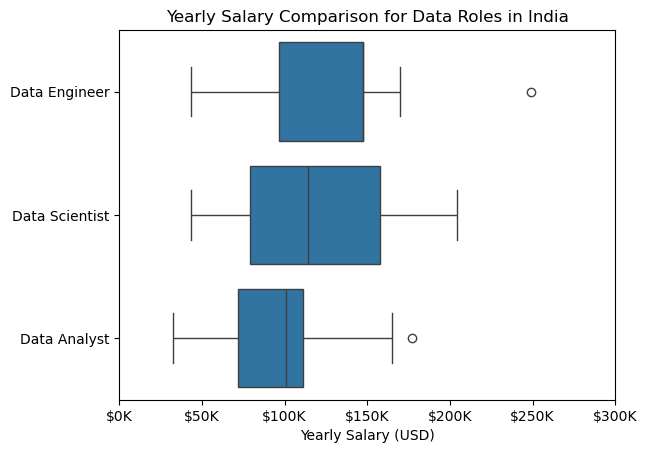

In [66]:
# Problem Statement:
# Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of 
# Data Analyst, Data Engineer, and Data Scientist job postings in India:

# Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
# Set the x-axis limit to 300,000 and format it as $100k.
# Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_in=df[df.job_country.isin(['India']) & df.job_title_short.isin(job_titles)]
df_in=df_in.dropna(subset='salary_year_avg')
sns.boxplot(data=df_in,x='salary_year_avg',y='job_title_short')
plt.xlim(0,300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlabel('Yearly Salary (USD)')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.ylabel('')


plt.show()

---

## 🟨 Salary Distribution for United States (2.20.4)

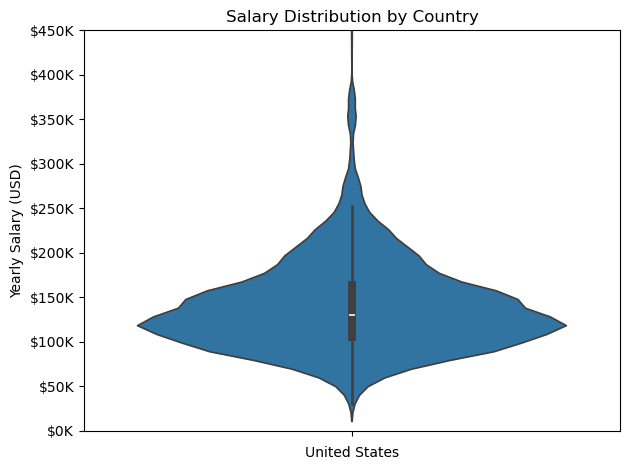

In [73]:
# Problem Statement:
# Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
# Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.
df_us=df[df.job_country.isin(['United States']) & df.job_title_short.isin(['Data Scientist'])].copy()
df_us=df_us.dropna(subset='salary_year_avg')
sns.violinplot(df_us.salary_year_avg)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.title('Salary Distribution by Country')
plt.xlabel('United States')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  

plt.tight_layout()
plt.show()

---